# Data Wrangling and basic plotting

In this tutorial we'll take a look at the module ```pandas```  which is indispensible for working with tabular data (e.g. xlxs, csv). 

**Resources**
[Pandas Documentation](https://pandas.pydata.org/docs/)

[Python Data Science Handbook - Jake Vanderplas](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) 🌟🌟🌟🌟🌟

[Todays data](https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv)

[A collection of Jupyter notebook ebooks](https://nbviewer.jupyter.org/)

[Google Dorks Cheatsheet](https://www.sans.org/security-resources/GoogleCheatSheet.pdf)

Today we'll look at some Covid-19 data



### Imports
One of the reasons python  is so popular is the huge number of **libraries**, which contain useful functions that apply to particular tasks. Here, we'll import [**pandas**](https://pandas.pydata.org/), a data analysis library that lets us handle tabular data (e.g. ```.csv``` and ```.xlsx``` files) easily.

When we import the libraries, the python interpreter compiles them into bytecode that the machine can read. We'll see how to access and use these functions below.

In [1]:
import pandas as pd 
#give pandas as shorter handle (optional)

# create  a DataFrame object using the pandas.read_csv function
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv')
# the read_csv function can read data via a url like above, or from a filepath.
# must be a string, so remember your quote marks!
# df is short for DataFrame, which is a core pandas object
df.head() # show first couple of rows

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [2]:
df.describe() # quickly get info on the data

,Confirmed,Recovered,Deaths
count,2.199600e+04,21996.000000,21996.000000
mean,6.453807e+03,1947.152164,429.930760
std,4.921317e+04,12047.697427,3402.508984
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.300000e+01,0.000000,0.000000
75%,5.330000e+02,67.000000,9.000000
max,1.486757e+06,272265.000000,89562.000000


In [3]:
df.shape # quickly find the size (rows, columns)

(21996, 5)

In [4]:
# Ways to select columns

print(df.columns) # what are the columns called?

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')


In [5]:
# select (and view) an individual column
df['Date'] # also valid: df.loc[:,'Date'], where .loc is the locate function, : is all rows, 'Date' is the column header
# and df.iloc[:,0] - which selects data based on position, can be less reliable than using the column name
# Selecting an individual column returns a 'Series' object, which

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
21991    2020-05-17
21992    2020-05-17
21993    2020-05-17
21994    2020-05-17
21995    2020-05-17
Name: Date, Length: 21996, dtype: object

In [6]:
# There are a lot of repeats of the date, so let's see each unique date
df['Date'].unique()

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-

In [7]:
# the 'pivot' function reshapes the DataFrame based on two column values
# in this case I want to make a table of the confirmed cases, by country and by date

confirmed = df.pivot(index = 'Country', columns = 'Date', values = 'Confirmed')
confirmed.head()

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664
Albania,0,0,0,0,0,0,0,0,0,0,...,850,856,868,872,876,880,898,916,933,946
Algeria,0,0,0,0,0,0,0,0,0,0,...,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019
Andorra,0,0,0,0,0,0,0,0,0,0,...,752,754,755,755,758,760,761,761,761,761
Angola,0,0,0,0,0,0,0,0,0,0,...,43,43,45,45,45,45,48,48,48,48


## Plotting

I want to plot the ```confirmed``` dataframe as a line plot. To do that, I'll use a plotting library called ```matplotlib.pyplot``` from Matworks. 

[matplotlib.pyplot Documentation](https://matplotlib.org/api/pyplot_api.html)

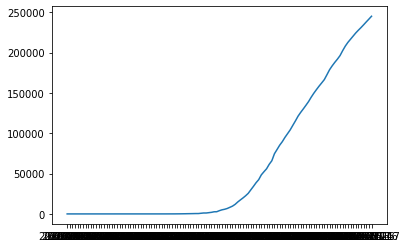

In [8]:
import matplotlib.pyplot as plt # another short handle

# Let's start with a single line
uk_cases = confirmed.loc['United Kingdom',:] # row = 'United Kingdom', columns = : (all)

plt.plot(uk_cases) # plt.plot for line plots 
plt.show() # render
# horrid!
# We can do better than this!

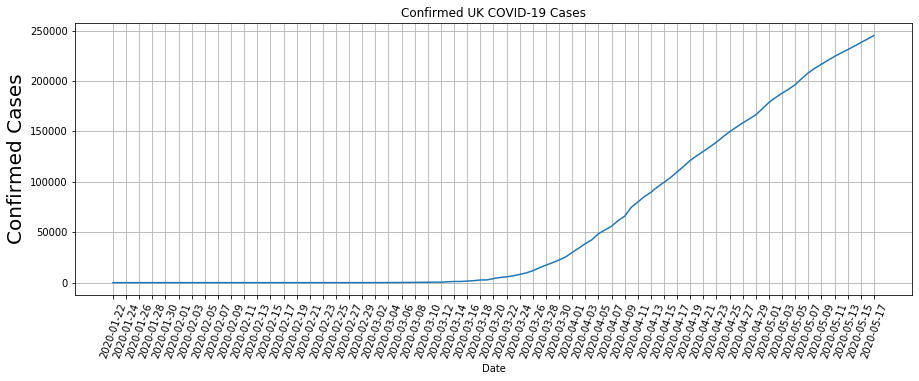

In [11]:
plt.figure(figsize=(15,5)) # manually make the canvas size wider
plt.plot(uk_cases)

evey_other_date = confirmed.columns[::2] # indexing a list or series by [::2] returns
# every other value. This will make our axis less crowded
plt.xticks(evey_other_date, rotation = 70) 
# the default behaviour was to detect the index of the uk_cases series
# Here, we manually give the plt.xticks() function the index we want to plot
# and also the extra rotation=x parameter, to rotate the dates

plt.xlabel('Date') # always label your axes! 
plt.ylabel('Confirmed Cases', fontsize = 20) # add keyword arguments for extra features, see documentation
plt.title('Confirmed UK COVID-19 Cases')
plt.grid()
plt.show()

# Multiple Lines, one plot

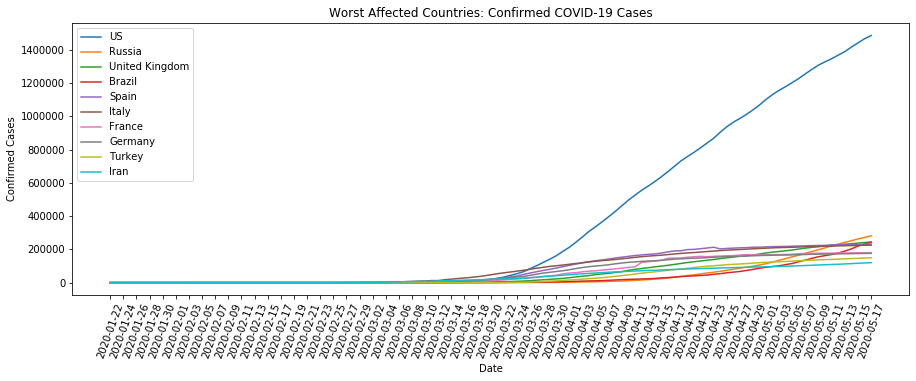

In [12]:
# worse affected countries
worst_affected =  confirmed.iloc[:,-1].nlargest(10) # .iloc[:,-1] is the index lookup method, which lets you 
# find a column or row based on its position, instead of its name. [:,-1] means all rows, last column (most recent)
# nlargest(10) selects the 10 largest confirmed cases

plt.figure(figsize=(15,5)) 

for i in worst_affected.index:
    # for every country in the confirmed sheet
    cases = confirmed.loc[i,:]
    plt.plot(cases) # overlay the plots!

# Only need to add these touch ups once
plt.xticks(confirmed.columns[::2], rotation = 70)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases') 
plt.title('Worst Affected Countries: Confirmed COVID-19 Cases')
plt.legend(worst_affected.index)

#plt.yscale('log') #try uncommenting this command for a log scale
plt.show()